# Mask R-CNN demo

This notebook illustrates one possible way of using `maskrcnn_benchmark` for computing predictions on images from an arbitrary URL.

Let's start with a few standard imports

In [39]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from PIL import Image
import numpy as np

In [40]:
# this makes our figures bigger
pylab.rcParams['figure.figsize'] = 20, 12

Those are the relevant imports for the detection model

In [41]:
from maskrcnn_benchmark.config import cfg
from predictor import COCODemo

We provide a helper class `COCODemo`, which loads a model from the config file, and performs pre-processing, model prediction and post-processing for us.

We can configure several model options by overriding the config options.
In here, we make the model run on the CPU

In [60]:
#config_file = "../configs/caffe2/e2e_mask_rcnn_R_50_FPN_1x_caffe2.yaml"
config_file = "../configs/e2e_faster_rcnn_R_101_FPN_1x.yaml"
# update the config options with the config file
cfg.merge_from_file(config_file)
# manual override some options
cfg.merge_from_list(["MODEL.DEVICE", "cuda"])

Now we create the `COCODemo` object. It contains a few extra options for conveniency, such as the confidence threshold for detections to be shown.

In [61]:
coco_demo = COCODemo(
    cfg,
    min_image_size=800,
    confidence_threshold=0.1,
)

Let's define a few helper functions for loading images from a URL

In [62]:
def load(path):
    """
    Given an url of an image, downloads the image and
    returns a PIL image
    """
    pil_image = Image.open(path).convert("RGB")
    # convert to BGR format
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    return image

def imshow(img):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")

Let's now load an image from the COCO dataset. It's reference is in the comment

### Computing the predictions

We provide a `run_on_opencv_image` function, which takes an image as it was loaded by OpenCV (in `BGR` format), and computes the predictions on them, returning an image with the predictions overlayed on the image.

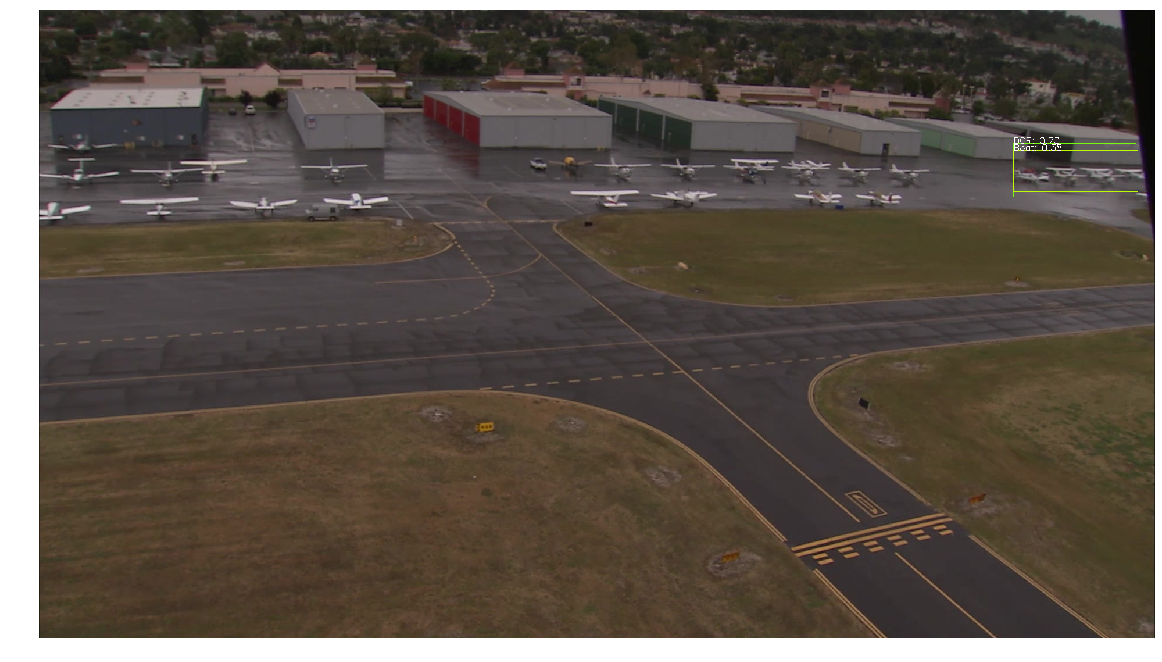

In [64]:
# compute predictions
image = load('/home/jiasheng/maskrcnn-benchmark/datasets/neo/Neovision2-Training-Heli-001/000050.png')

predictions = coco_demo.run_on_opencv_image(image)
imshow(predictions)